In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report

In [30]:
dataset = pd.read_csv("Data/BTC-USD.csv")
print(dataset.shape)
dataset.head()

(1827, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000
1,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008
2,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,275564000
3,2016-12-24,922.179993,923.479004,886.335022,898.822021,898.822021,137727008
4,2016-12-25,899.651978,899.651978,862.424011,896.182983,896.182983,143664992


In [31]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,15208.247358,15629.267253,14746.920288,15231.832471,15231.832471,2.092230e+10
std,16829.476707,17296.796539,16289.465757,16838.811505,16838.811505,2.122934e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,5308.327637,5422.169434,5221.697753,5319.541504,5319.541504,4.474525e+09
50%,8585.262695,8744.828125,8313.340820,8595.740234,8595.740234,1.607165e+10
75%,13500.216309,13852.566406,12921.156250,13548.505860,13548.505860,3.260844e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [32]:
####### Preprocessing #######

In [33]:
#### Scaling ####
scaled_data = dataset[['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = MinMaxScaler(copy=False)
scaled_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(scaled_data[['Open', 'High', 'Low', 'Close', 'Volume']])
scaled_data

D:\Users\kkats\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Open,High,Low,Close,Volume
0,0.000381,0.000161,0.000665,0.000846,0.000270
1,0.000884,0.000772,0.001195,0.001299,0.000397
2,0.001343,0.001498,0.001660,0.002159,0.000612
3,0.002201,0.001474,0.001990,0.001813,0.000219
4,0.001864,0.001123,0.001625,0.001773,0.000236
...,...,...,...,...,...
1822,0.702042,0.694191,0.683605,0.680117,0.093591
1823,0.680560,0.684023,0.683304,0.689799,0.074200
1824,0.690064,0.695438,0.697086,0.687676,0.071510
1825,0.687865,0.685316,0.683020,0.690270,0.088060


In [ ]:
X = scaled_data[['Open', 'High', 'Low', 'Volume']]
y = scaled_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
####### Linear Regression #######

In [ ]:
#### Training ####
linReg = LinearRegression()
linReg.fit(X_train, y_train)
print("Coefficients: \n", linReg.coef_)
print("Intercept: \n", linReg.intercept_)

In [ ]:
#### Testing ####
y_pred_lin = linReg.predict(X_test)
dfp = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred_lin})
dfp.head()

In [ ]:
reg_score = linReg.score(X_test, y_test)
print("Linear Regression Score: ", reg_score)
print("Absolute Squared Error: ", mean_absolute_error(y_test, y_pred_lin))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_lin))

In [ ]:
y = linReg.coef_[0] * X_test['Open'] + linReg.coef_[1] * X_test['High'] + linReg.coef_[2] * X_test['Low'] + linReg.coef_[3] * X_test['Volume'] + linReg.intercept_

In [ ]:
#### Plotting ####
plt.subplots(1, figsize=(15, 15))
plt.plot(np.linspace(0, y_test.size, y_test.size), y_test, color='orange', label='Actual Data')
plt.plot(np.linspace(0, y_test.size, y_test.size), y, label='Best fit line')
plt.grid(color='#000000', linestyle='-', linewidth=0.5)
plt.legend(loc="upper left")

In [ ]:
plt.scatter(dfp['Actual_Price'], dfp['Predicted_Price'])

In [ ]:
####### Logistic Regression #######

In [34]:
X_log = scaled_data[['Open', 'High', 'Low', 'Volume']]
tmp =  scaled_data.Close.gt(scaled_data.Close.shift())
tmp = np.where(tmp == False, 0, 1)
y_log = tmp
y_log

array([0, 1, 1, ..., 0, 1, 1])

In [67]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=42, shuffle=False)
print(X_train_log.shape)
print(y_train_log.shape)
print(X_test_log.shape)
print(y_test_log.shape)

(1278, 4)
(1278,)
(549, 4)
(549,)


In [71]:
#### Training ####
logReg = LogisticRegression()
logReg.fit(X_train_log, y_train_log)
y_pred_log = logReg.predict_proba(X_test_log)
y_pred_log

array([[0.47638527, 0.52361473],
       [0.47736676, 0.52263324],
       [0.47897525, 0.52102475],
       ...,
       [0.75522908, 0.24477092],
       [0.75361076, 0.24638924],
       [0.7574426 , 0.2425574 ]])

In [72]:
dfp = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred_lin})
dfp

,Actual_Price,Predicted_Price
1278,0.127654,0.128212
1279,0.132821,0.131742
1280,0.132535,0.131644
1281,0.127803,0.129198
1282,0.127073,0.125493
...,...,...
1822,0.680117,0.684417
1823,0.689799,0.686857
1824,0.687676,0.700880
1825,0.690270,0.683815


In [73]:
#### Testing ####
print("Coefficients: \n", logReg.coef_)
print("Mean squared error: ", mean_squared_error(y_test_log, y_pred_log))
print("Classification report: ", classification_report(y_test_log, y_pred_log))

Coefficients: 
 [[-1.42377476 -0.43689316 -0.29536085 -0.17958001]]


ValueError: y_true and y_pred have different number of output (1!=2)

In [60]:
scaled_data['Close']

0       0.000846
1       0.001299
2       0.002159
3       0.001813
4       0.001773
          ...   
1822    0.680117
1823    0.689799
1824    0.687676
1825    0.690270
1826    0.715508
Name: Close, Length: 1827, dtype: float64

In [61]:
y_test_log.size

549

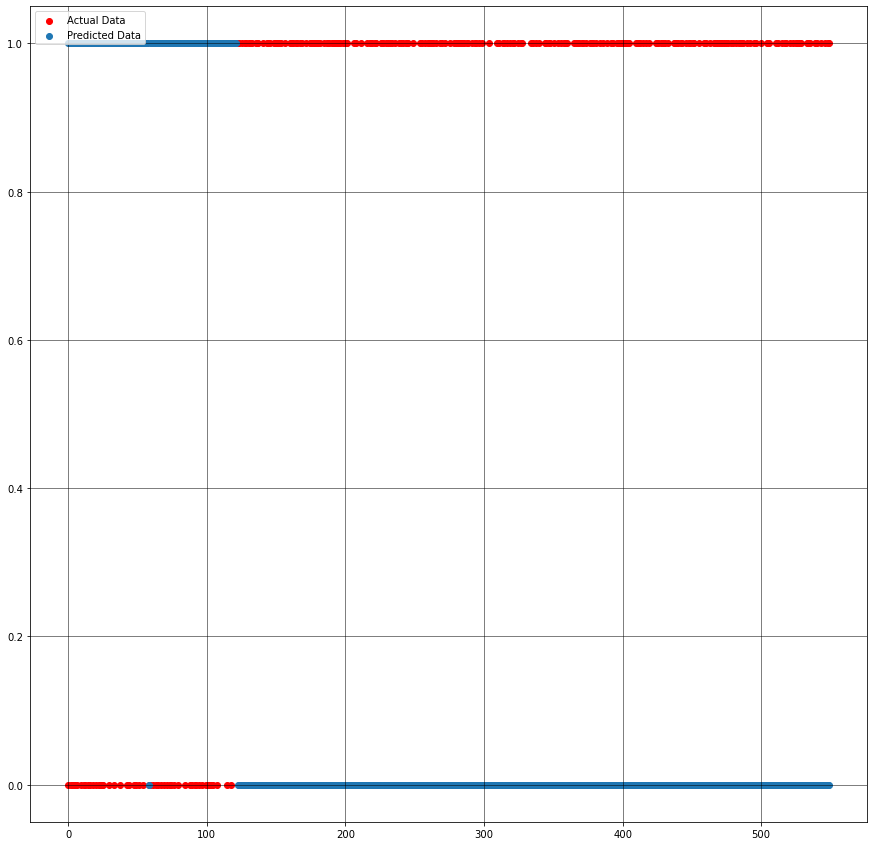

In [64]:
#### Plotting ####
plt.subplots(1, figsize=(15, 15))
plt.scatter(np.linspace(0, 549, 549), y_test_log, color='red', label='Actual Data')
plt.scatter(np.linspace(0, 549, 549), y_pred_log, label='Predicted Data')
plt.grid(color='#000000', linestyle='-', linewidth=0.5)
plt.legend(loc="upper left")